In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ejlok1/cremad")

print("Path to dataset files:", path)

C:\Users\seema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 451M/451M [02:04<00:00, 3.80MB/s] 

Extracting files...


Path to dataset files: C:\Users\seema\.cache\kagglehub\datasets\ejlok1\cremad\versions\1


In [16]:
import os

datasetpath='C:/Users/seema/.cache/kagglehub/datasets/ejlok1/cremad/versions/1/AudioWAV'
audio_files = [f for f in os.listdir(datasetpath) if f.endswith('.wav')]
print(f"Number of audio files: {len(audio_files)}")


Number of audio files: 7442


In [38]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,BatchNormalization


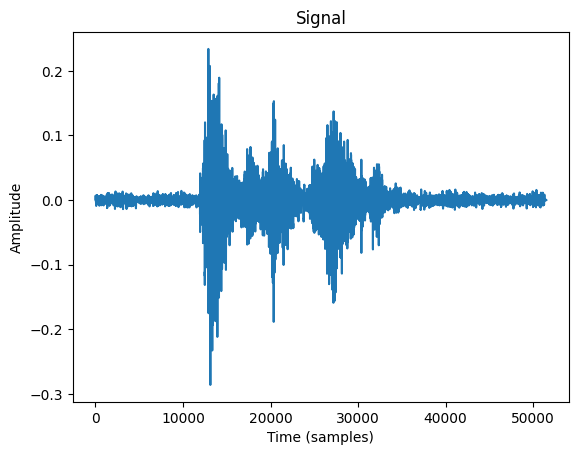

In [25]:
y, sr = librosa.load( os.path.join(datasetpath, os.listdir(datasetpath)[1]))
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

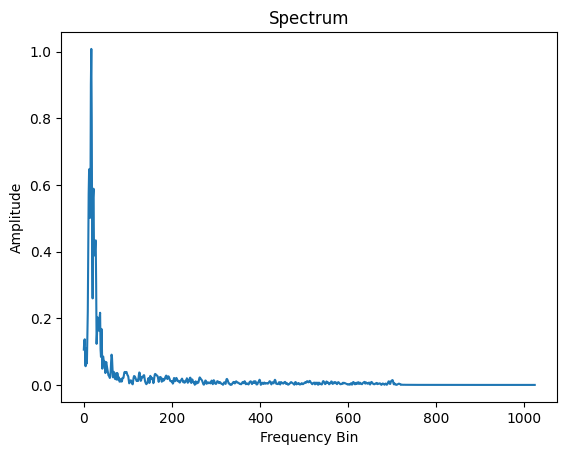

In [27]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

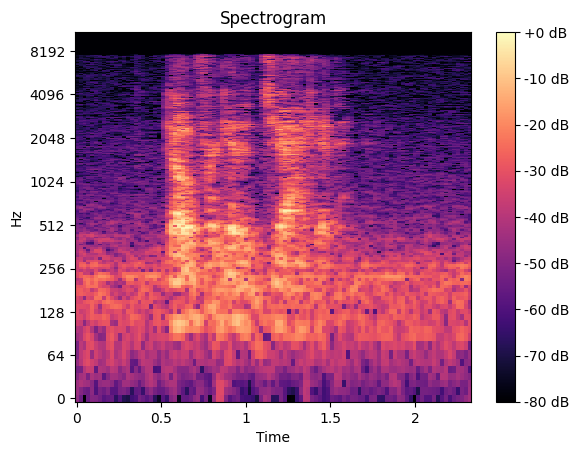

In [28]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

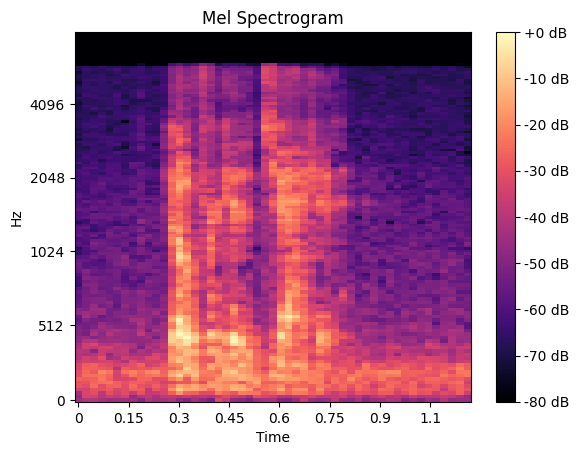

In [29]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [34]:
def audio_to_mel_spectrogram(audio_file, output_dir, sample_rate=22050, n_mels=128):
    y, sr = librosa.load(audio_file, sr=sample_rate)
    n_fft = 2048
    ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
    spec = np.abs(librosa.stft(y, hop_length=512))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
   
    # Create a plot and save as an image
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    
    # Save the plot as an image
    file_name = os.path.basename(audio_file).replace('.wav', '.png')
    output_path = os.path.join(output_dir, file_name)
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()
    return output_path

# Directory to save spectrogram images
output_dir="C:/Users/seema/OneDrive/Desktop/hwbcs"
os.makedirs(output_dir, exist_ok=True)

# Convert all audio files to mel-spectrograms
for file in audio_files:
    audio_path = os.path.join(datasetpath, file)
    image_path = audio_to_mel_spectrogram(audio_path, output_dir)
    print(f"Saved: {image_path}")
   

Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_ANG_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_DIS_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_FEA_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_HAP_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_NEU_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_DFA_SAD_XX.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_ANG_HI.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_ANG_LO.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_ANG_MD.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_DIS_HI.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_DIS_LO.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_DIS_MD.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_FEA_HI.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_FEA_LO.png
Saved: C:/Users/seema/OneDrive/Desktop/hwbcs\1001_IEO_FEA_MD.png
Saved: C:/Users/seema/One

In [37]:
import shutil

emotion_mapping = {
    'SAD': 'Sad',
    'ANG': 'Angry',
    'HAP': 'Happy',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'NEU': 'Neutral'
}

# Organize images by emotion
for file in os.listdir(output_dir):
    
    if file.endswith('.png') and len(file.split('_')) > 2:
        emotion_code = (file.split('_'))[2]  # Adjust index based on filename structure
        emotion_label = emotion_mapping.get(emotion_code, "Unknown")
    
        emotion_dir = os.path.join(output_dir, emotion_label)
        os.makedirs(emotion_dir, exist_ok=True)
    
        src_path = os.path.join(output_dir, file)
        dst_path = os.path.join(emotion_dir, file)
        shutil.move(src_path, dst_path)
       
    else:
        print(f"Skipping file: {file}")
    

Skipping file: advertising.csv
Skipping file: Angry
Skipping file: animal_data
Skipping file: animal_data.zip
Skipping file: Disgust
Skipping file: Ecommerce Customers (1).csv
Skipping file: Fear
Skipping file: Happy
Skipping file: housing linear regression.ipynb
Skipping file: housing.csv
Skipping file: image classsification.ipynb
Skipping file: import matplotlib.py
Skipping file: Neutral
Skipping file: Sad
Skipping file: Unknown


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt

In [18]:
data = []
path='C:/Users/seema/OneDrive/Desktop/hwbcs'
for emotion in os.listdir(path):
    emotion_dir = os.path.join(path, emotion)
    
    for file in os.listdir(emotion_dir):
        file_path = os.path.join(emotion_dir, file)
        data.append([file_path, emotion])


In [68]:
df = pd.DataFrame(data, columns=['File Path', 'Emotion'])
df.head()
EMOTION=df.Emotion.unique()

In [84]:
emotions=df.Emotion.unique()
df.to_csv('emotion_dataset.csv', index=False)
X=df['File Path']
y=df['Emotion']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)




In [85]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def preprocess(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=(96,96))  
        img_array = img_to_array(img)  
        img_array = img_array / 255.0  
        images.append(img_array)
    return np.array(images)
x=preprocess(X)

In [86]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101,shuffle=True)
Xtrain.shape

(5209, 96, 96, 3)

In [87]:


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96,96,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),                          
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),                                   
    tf.keras.layers.Dense(15, activation='softmax')                                  
    ])



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

C:\Users\seema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,986,383 (15.21 MB)

 Trainable params: 3,986,383 (15.21 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.fit(Xtrain,ytrain,epochs=20)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5588 - loss: 1.1518
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5577 - loss: 1.1514
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5778 - loss: 1.0952
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5845 - loss: 1.1053
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.5810 - loss: 1.0889
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.6148 - loss: 1.0449
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.5996 - loss: 1.0515
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.6083 - loss: 1.0151
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.6201 - loss: 0.9970
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.6366 - loss: 0.9828
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.6459 - loss: 0.9679
Epoch 12/20
163/163 ━━━━━━━━━━

In [104]:
results = model.evaluate(Xtest,ytest)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5513 - loss: 1.1837
Loss =  1.1582342386245728
Accuracy =  55.57546019554138 %


In [105]:
predictions = model.predict(Xtest)
label=EMOTION[np.argmax(predictions[1])]
x=0
for i in predictions:
    print("predicted value: ",EMOTION[np.argmax(i)])
    print("actual value: ",EMOTION[ytest[x]])
    x+=1
    if x==10:
        break

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
predicted value:  Fear
actual value:  Fear
predicted value:  Neutral
actual value:  Disgust
predicted value:  Sad
actual value:  Neutral
predicted value:  Sad
actual value:  Neutral
predicted value:  Sad
actual value:  Disgust
predicted value:  Neutral
actual value:  Neutral
predicted value:  Sad
actual value:  Neutral
predicted value:  Sad
actual value:  Sad
predicted value:  Sad
actual value:  Sad
predicted value:  Disgust
actual value:  Disgust
